# Experiment results

This notebook computes some results for a given experiment. It does not aggregate over all experiments.

In [1]:
EXPERIMENT = 1

In [2]:
%cd ..
%matplotlib inline

D:\Projects\Python\PL-Heuristic


In [3]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from analysis.caching import get_cached_results, has_cached_results, store_results
from analysis.measures import compute_measures

In [4]:
# Computing the measures for an entire experiment can be quite slow, so we normally
# work with cached data.
if has_cached_results(EXPERIMENT):
    results = get_cached_results(EXPERIMENT)
else:
    results = compute_measures(EXPERIMENT)
    store_results(EXPERIMENT, results)

# Analysis

In [5]:
# Sanity check
assert len(results) == 100

In [6]:
df = pd.DataFrame(results, index=np.arange(1, 101))
df.describe()

,heuristic_objective,ilp_objective
count,100.000000,100.000000
mean,4637.717210,4726.152851
std,75.944587,67.766366
min,4470.599860,4556.853511
25%,4582.785269,4679.302946
50%,4637.394685,4719.524970
75%,4694.811678,4773.378423
max,4821.463286,4895.333694


## Objective

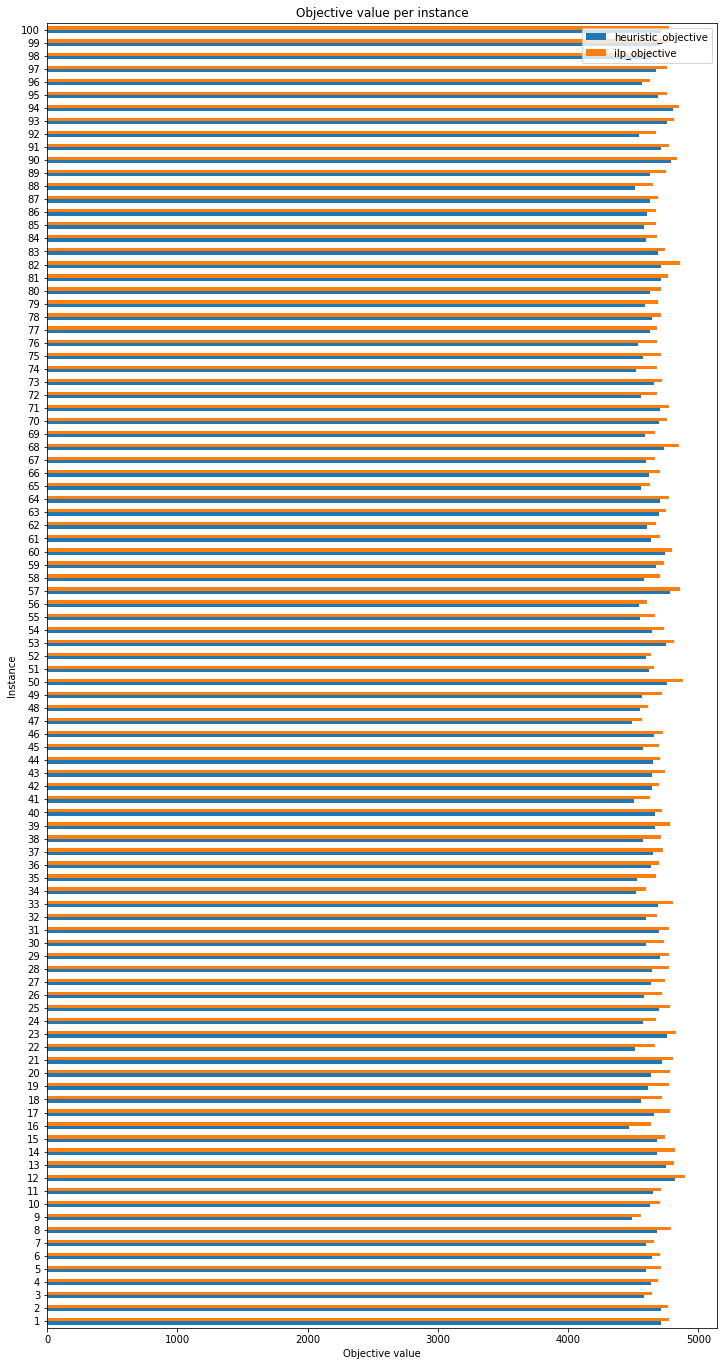

In [7]:
_, ax = plt.subplots(figsize=(12, 24))

ax.set_title("Objective value per instance")
ax.set_ylabel("Instance")
ax.set_xlabel("Objective value")

df[["heuristic_objective", "ilp_objective"]].plot.barh(ax=ax)

In [8]:
difference = (100 * (df['heuristic_objective'] - df['ilp_objective']) / df['ilp_objective']).mean()
print(f"Percentage difference between heuristic and optimal solution is {difference:.2f}%.")

Percentage difference between heuristic and optimal solution is -1.87%.
